In [1]:
# Package imports for data science and time series analysis in particular
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd;
import scipy.stats as stats;
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# Lab time series analysis: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

In [19]:
sp = pd.read_csv('../data/SP500.csv', parse_dates=True, index_col=0)

<AxesSubplot:xlabel='Date'>

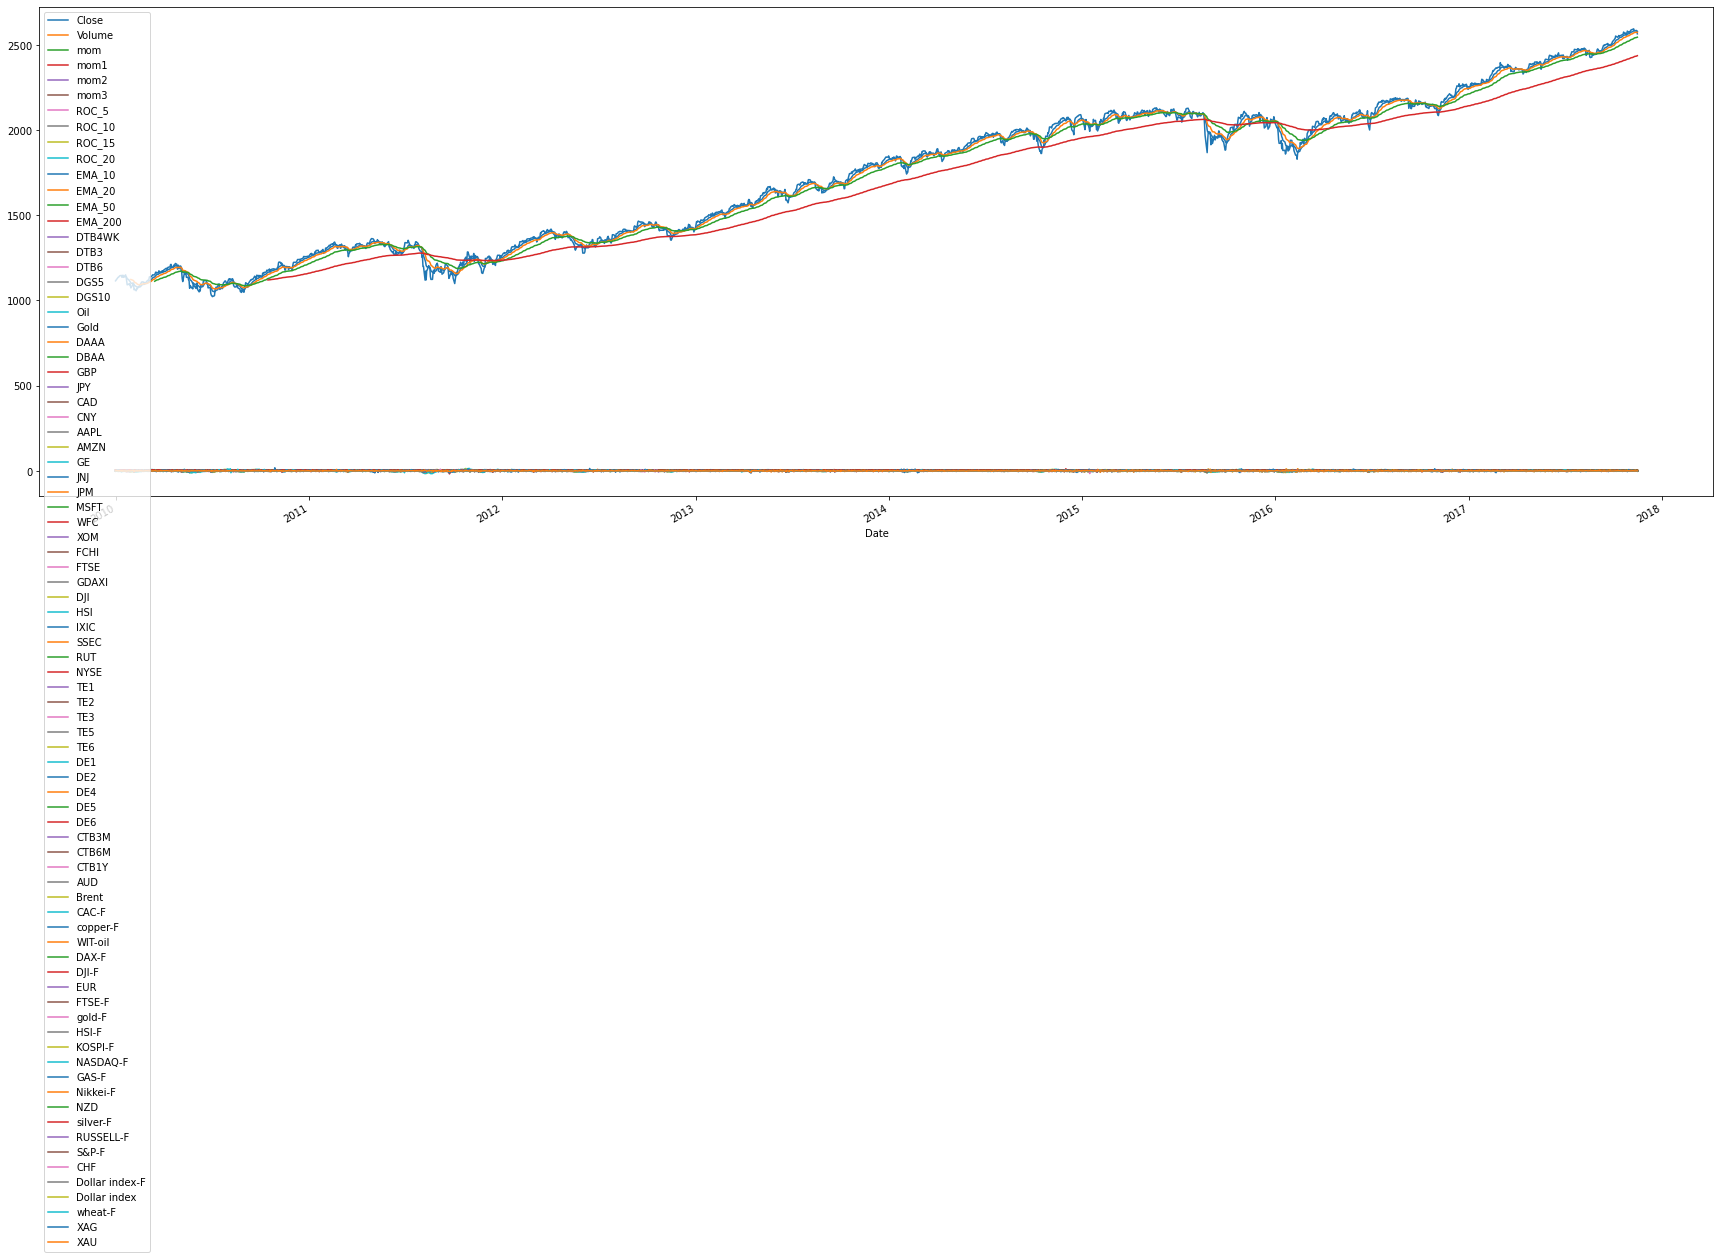

In [20]:
sp.plot(figsize=(30,10))

Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

In [21]:
#calculate the 50-day moving average over the last 10 weeks
sp['MA50'] = sp['Close'].rolling(50).mean()
#calculate the 200-day moving average over the past 40 weeks
sp['MA200'] = sp['Close'].rolling(200).mean()



- Plot the S&P500 index with both moving averages


<AxesSubplot:xlabel='Date'>

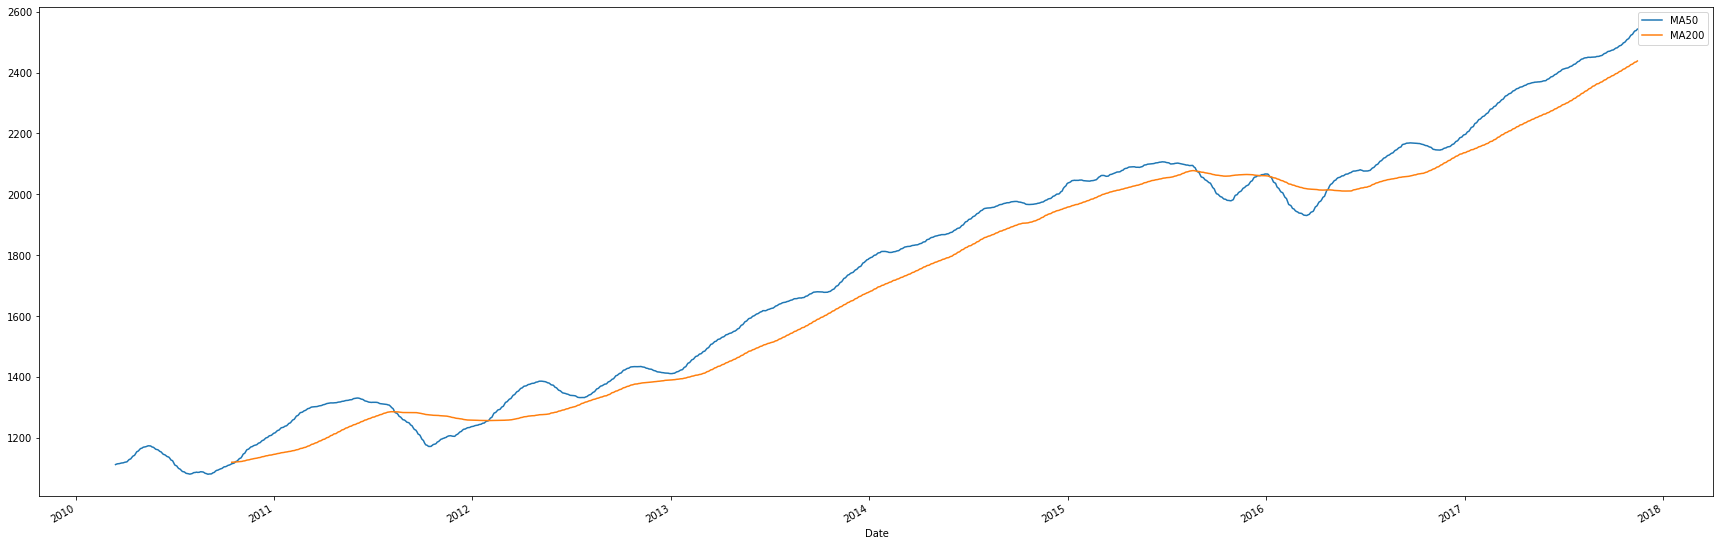

In [22]:
sp.plot(y=['MA50','MA200'], figsize=(30,10))


- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

In [28]:
sp["golden_cross_signal"] = sp.apply(lambda row: 1 if row[f"MA50"] > row[f"MA200"]  else 0, axis=1)


In [30]:
list_golden_cross_ts = []
first_golden_cross = False

for idx, each in sp["golden_cross_signal"].iteritems():
    if each == 1:
        # If its the first golden cross we see we add the timestamp
        if first_golden_cross:
            list_golden_cross_ts.append(idx)
            first_golden_cross = False
    else:
        first_golden_cross = True

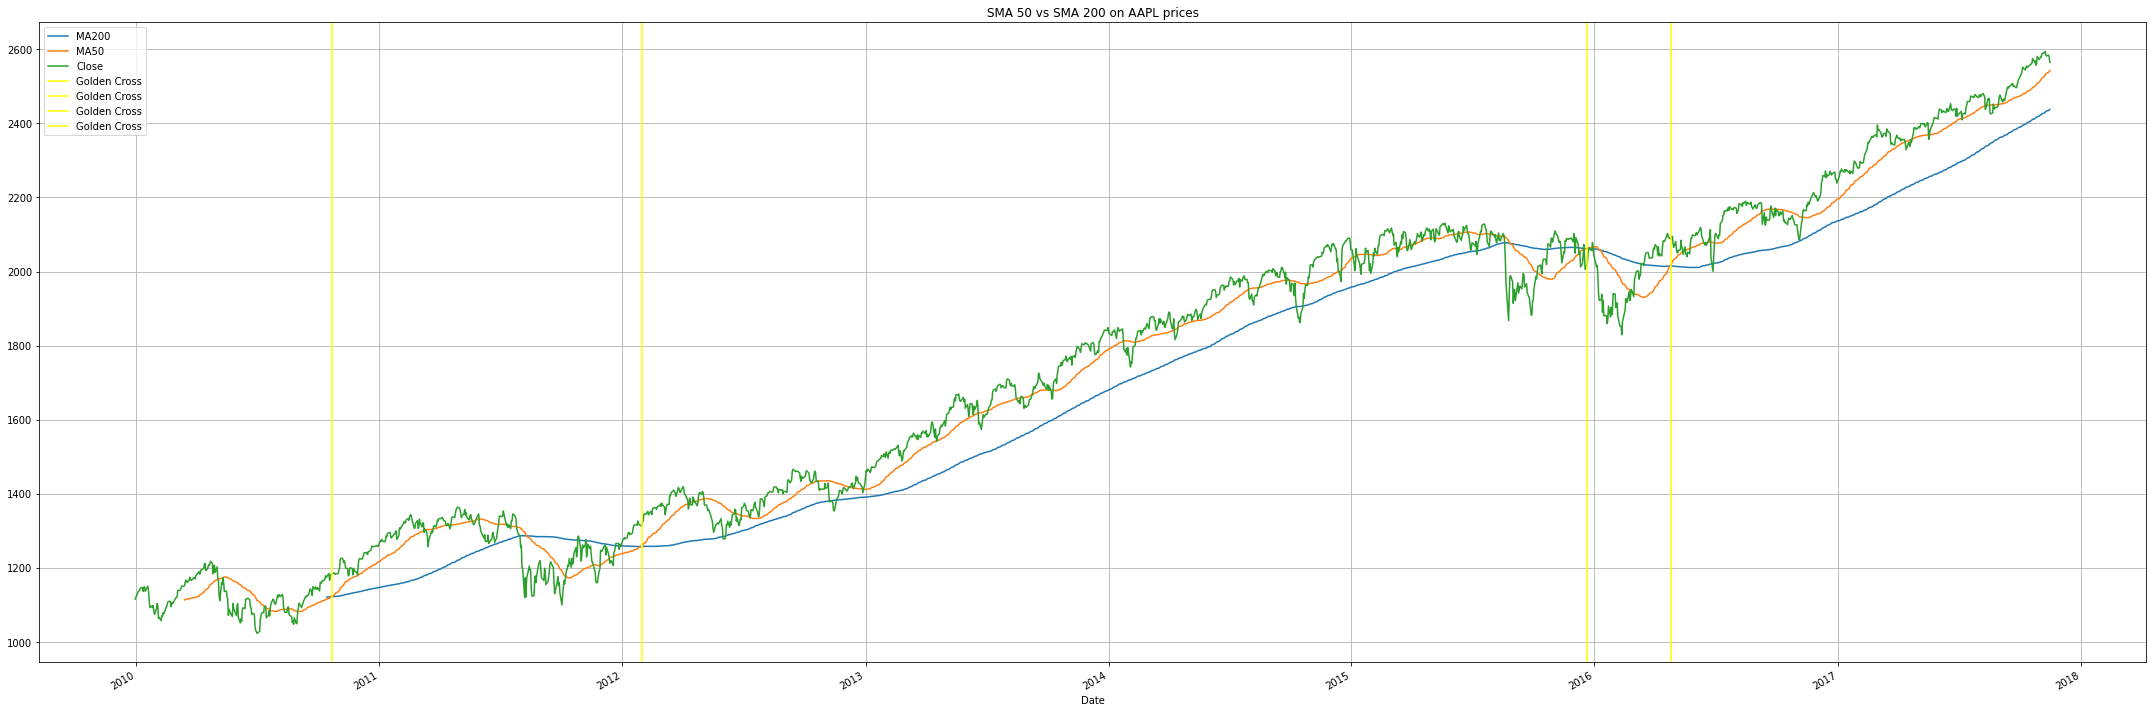

In [48]:
fig, axes = plt.subplots(1,1, figsize=(30,10))
sp[["MA200","MA50","Close"]].plot(figsize=(30,10), grid=True, title="SMA 50 vs SMA 200 on AAPL prices", ax=axes)

for each in list_golden_cross_ts:
    axes.axvline(x=each, label="Golden Cross", c="yellow")
    
axes.legend()
fig.tight_layout()
# plt.savefig("golden_cross_python.png")

In [36]:
sp["death_cross"] = sp.apply(lambda row: 1 if row[f"MA50"] < row[f"MA200"]  else 0, axis=1)


In [37]:
list_death_cross_ts = []
first_death_cross = False
for idx, each in sp["death_cross"].iteritems():
    if each == 1:
        # If its the first death cross we see we add the timestamp
        if first_death_cross:
            list_death_cross_ts.append(idx)
            first_death_cross = False
    else:
        first_death_cross = True

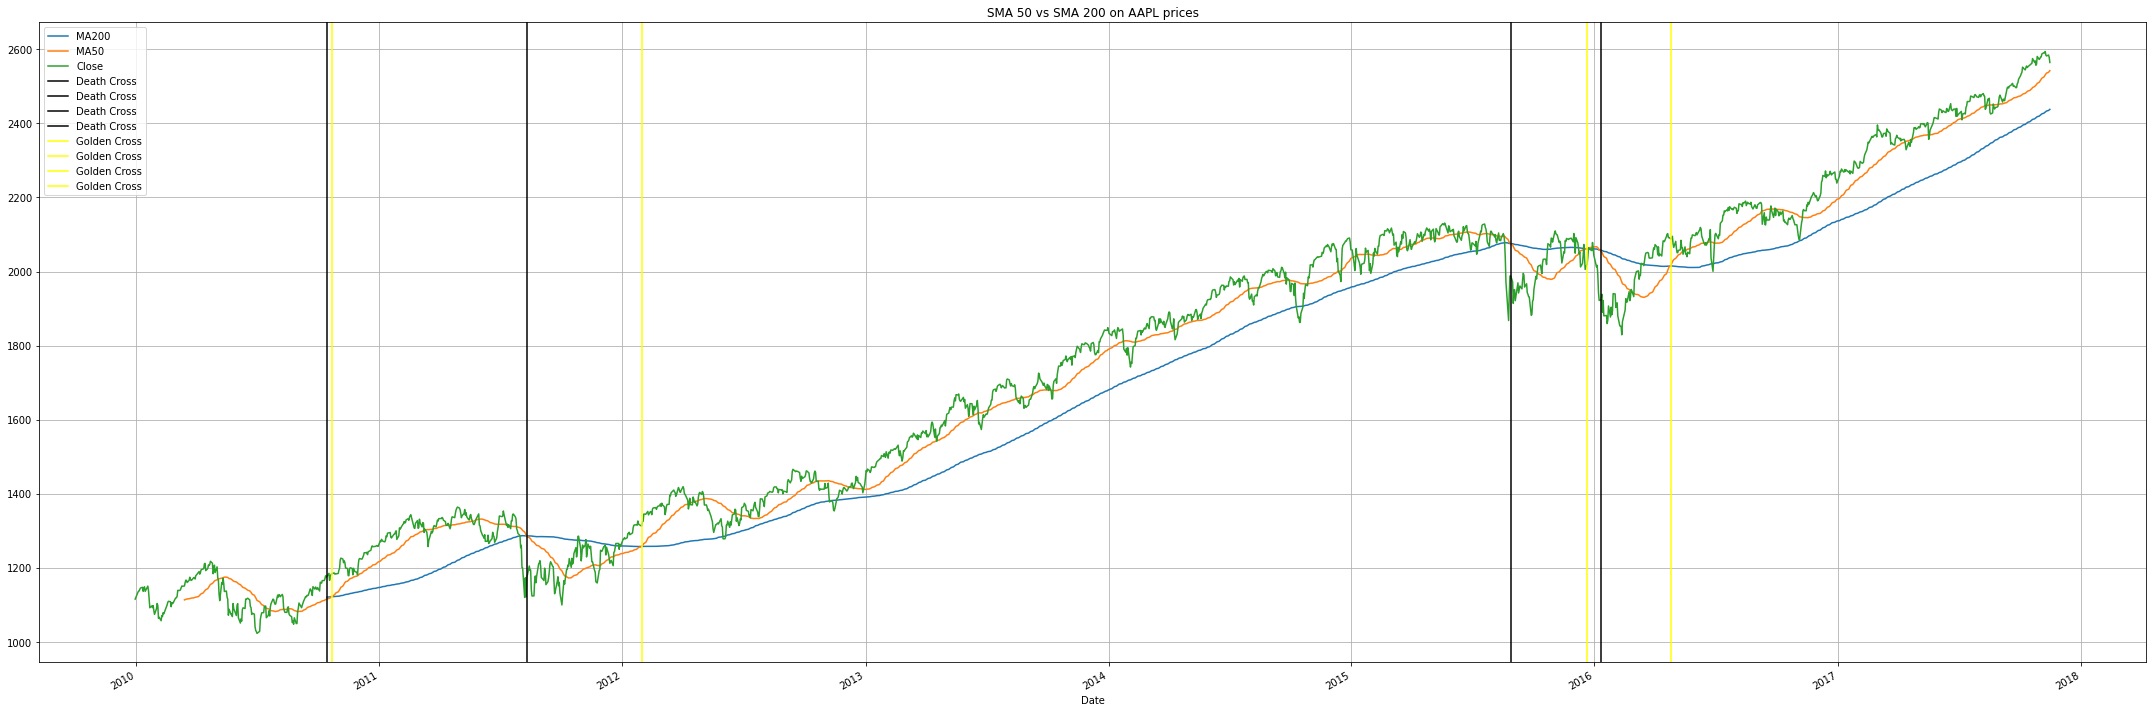

In [50]:
fig, axes = plt.subplots(1,1, figsize=(30,10))
sp[["MA200","MA50","Close"]].plot(figsize=(30,10), grid=True, title="SMA 50 vs SMA 200 on AAPL prices", ax=axes)

for each in list_death_cross_ts:
    axes.axvline(x=each, label="Death Cross", c="black")
for each in list_golden_cross_ts:
    axes.axvline(x=each, label="Golden Cross", c="yellow")   

    
axes.legend()
fig.tight_layout()

## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029